In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
#创建 dataframe
data = {
    '真实标签':[1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0],
    '预测分数':[0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]
}
df = pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


In [11]:
df_sorted=df.sort_values(by='预测分数',ascending=False)

cumulativr_tp=df_sorted['真实标签'].cumsum()
cumulativr_fp=(1-df_sorted['真实标签']).cumsum()

total_tp=cumulativr_tp.iloc[-1]
total_fp=cumulativr_fp.iloc[-1]

fpr=cumulativr_fp / total_fp
tpr=cumulativr_tp / total_tp

roc_auc=auc(fpr,tpr)

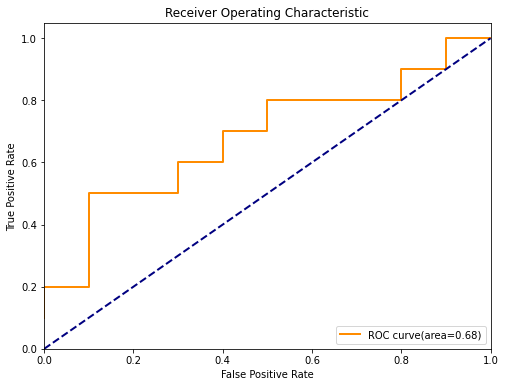

In [12]:
#绘制roc曲线
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

每一折的得分:[1.         0.96666667 0.93333333 0.93333333 0.96666667]
平均得分:0.9600000000000002


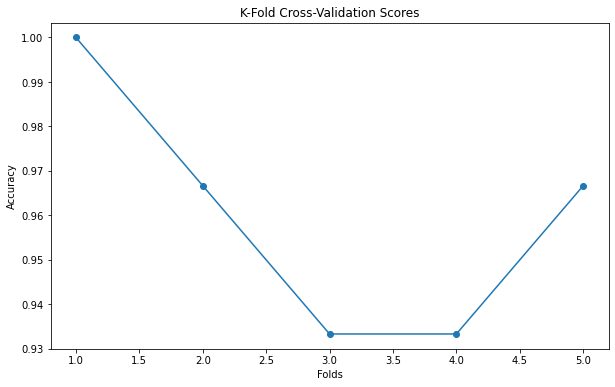

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier
# 加载数据集
iris = load_iris() 
x=iris.data 
y= iris.target
# 初始化随机森林分类器
classifier =RandomForestClassifier(n_estimators=100,random_state=42)
# 初始化K折交叉验证对象，这里以5折为例
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#进行K折交叉验证
scores = cross_val_score(classifier, x, y, cv=kf)
# 打印每一折的得分以及平均得分
print(f"每一折的得分:{scores}") 
print(f"平均得分:{scores.mean()}")
# 可视化K折交叉验证的过程
import matplotlib.pyplot as plt
# 记录每一折的索引和得分
folds = list(range(1,len(scores)+1)) 
plt.figure(figsize=(10,6))
plt.plot(folds, scores, marker='o')
plt.title('K-Fold Cross-Validation Scores') 
plt.xlabel('Folds') 
plt.ylabel('Accuracy') 
plt.show()

In [4]:
# 按照预测分数降序排序
import pandas as pd
from sklearn.metrics import auc
#按照预测分数降序排序
df_sorted = df.sort_values(by='预测分数',ascending=False)

#计算累积的真正例和假正例
cumulative_tp = df_sorted['真实标签'].cumsum()
cumulative_fp = (1 - df_sorted['真实标签']).cumsum()
#计算总的真正例和假正例
total_tp = cumulative_tp.iloc[-1]
total_fp = cumulative_fp.iloc[-1]

#计算FPR和TPR
fpr = cumulative_fp / total_fp
tpr = cumulative_tp / total_tp

#计算AUC值
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.68


In [10]:
#导入必要的库
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
#准备数据
#房屋面积(平方米)作为特征
X = np.array([[50],[70],[82],[101],[120]])#价格(万元)作为目标变量
y= np.array([300,500,610,702,800])
# 创建线性回归模型实例
model= LinearRegression()
# 训练模型
model.fit(X,y)
# 获取模型的斜率(权重)和截距(偏置) 
slope = model.coef_
intercept = model.intercept_
print(f"斜率(权重):{slope[0]}") 
print(f"截距(偏置):{intercept}")

斜率(权重):6.997414262384324
截距(偏置):-9.581246597713744
